In [30]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [31]:
# feature_ids = [2, 207, 187]
feature_ids = [2]

In [32]:
BASE_NAME = "/home/ubuntu/HeLa_20KInt-rt-4340-4580"
CONVERTED_DATABASE_NAME = '{}/HeLa_20KInt.sqlite'.format(BASE_NAME)

In [33]:
summed_frame_df_list = []
for feature_id in feature_ids:
    db_name = '{}/HeLa_20KInt-features-{}-{}.sqlite'.format(BASE_NAME, feature_id, feature_id)
    db_conn = sqlite3.connect(db_name)
    summed_frame_df_list.append((pd.read_sql_query("select * from summed_ms1_regions order by peak_id".format(feature_id), db_conn)))
    db_conn.close()

In [34]:
len(summed_frame_df_list)

1

In [35]:
summed_frame_df_list[0].head()

,feature_id,point_id,mz,retention_time_secs,scan,intensity,number_frames,peak_id,feature_point
0,2,2,878.405920,4461.544676,405,148134,4,1,2|2
1,2,5,878.406027,4461.605374,406,148373,4,1,2|5
2,2,10,878.405111,4460.272462,407,120046,3,1,2|10
3,2,14,878.406012,4459.032635,408,79212,2,1,2|14
4,2,17,878.405411,4459.040743,409,83918,2,1,2|17


In [36]:
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),  
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),  
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),  
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]
# Rescale to values between 0 and 1 
for i in range(len(tableau20)):  
    r, g, b = tableau20[i]  
    tableau20[i] = (r / 255., g / 255., b / 255.)

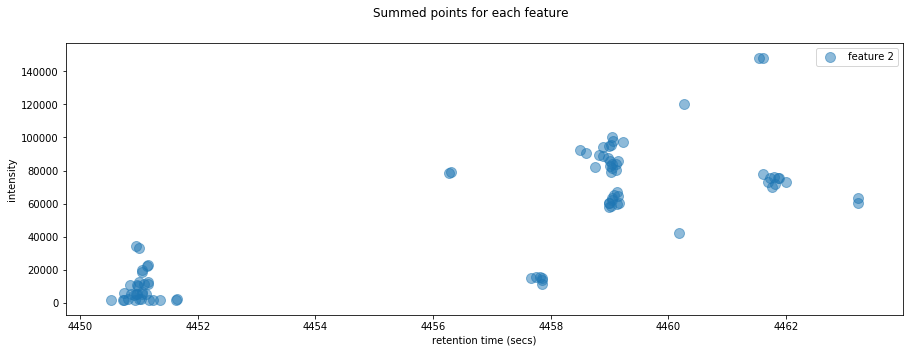

In [45]:
fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(15)
for idx,feature_id in enumerate(feature_ids):
    df = summed_frame_df_list[idx]
    ax.plot(df.retention_time_secs, df.intensity, marker='o', color=tableau20[idx], linestyle='', ms=10, alpha=.5, label="feature {}".format(feature_id))
plt.legend(loc='best')
plt.xlabel('retention time (secs)')
plt.ylabel('intensity')
plt.suptitle('Summed points for each feature')
plt.margins(0.06)
plt.show()

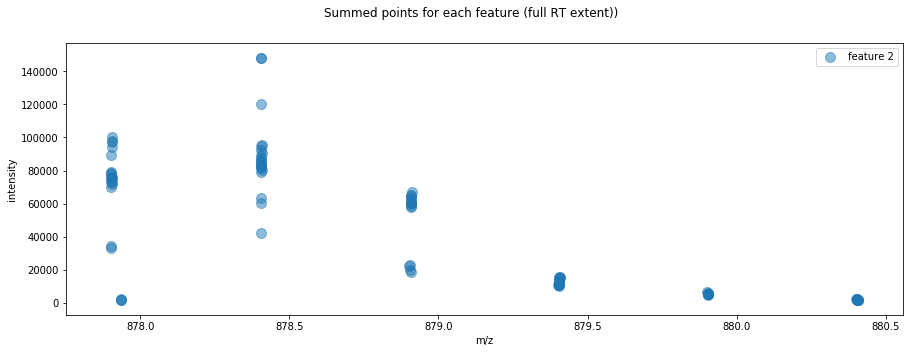

In [48]:
fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(15)
for idx,feature_id in enumerate(feature_ids):
    df = summed_frame_df_list[idx]
    ax.plot(df.mz, df.intensity, marker='o', color=tableau20[idx], linestyle='', ms=10, alpha=.5, label="feature {}".format(feature_id))
plt.legend(loc='best')
plt.xlabel('m/z')
plt.ylabel('intensity')
plt.suptitle('Summed points for each feature (full RT extent))')
plt.margins(0.06)
plt.show()

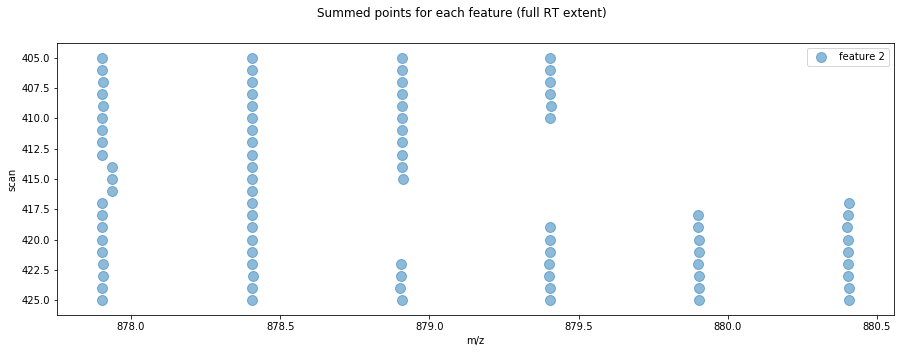

In [49]:
fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(15)
for idx,feature_id in enumerate(feature_ids):
    df = summed_frame_df_list[idx]
    ax.plot(df.mz, df.scan, marker='o', color=tableau20[idx], linestyle='', ms=10, alpha=0.5, label="feature {}".format(feature_id))
plt.legend(loc='best')
plt.xlabel('m/z')
plt.ylabel('scan')
plt.gca().invert_yaxis()
plt.suptitle('Summed points for each feature (full RT extent)')
plt.margins(0.06)
plt.show()

In [58]:
# find the feature's apex frame
df = summed_frame_df_list[0]
apex_rt = df.iloc[df.intensity.idxmax()].retention_time_secs
print("apex RT of feature {}: {:.1f}".format(feature_ids[0],apex_rt))

apex RT of feature 2: 4461.6


In [59]:
len(df)

87

In [60]:
df.head()

,feature_id,point_id,mz,retention_time_secs,scan,intensity,number_frames,peak_id,feature_point
0,2,2,878.405920,4461.544676,405,148134,4,1,2|2
1,2,5,878.406027,4461.605374,406,148373,4,1,2|5
2,2,10,878.405111,4460.272462,407,120046,3,1,2|10
3,2,14,878.406012,4459.032635,408,79212,2,1,2|14
4,2,17,878.405411,4459.040743,409,83918,2,1,2|17


In [55]:
apex_df = df[(df.retention_time_secs == apex_rt)]

In [57]:
len(apex_df)

1

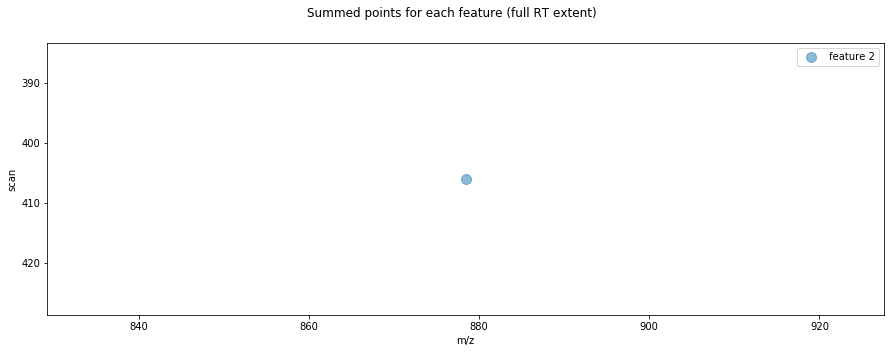

In [56]:
fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(15)
ax.plot(apex_df.mz, apex_df.scan, marker='o', color=tableau20[0], linestyle='', ms=10, alpha=0.5, label="feature {}".format(feature_id))
plt.legend(loc='best')
plt.xlabel('m/z')
plt.ylabel('scan')
plt.gca().invert_yaxis()
plt.suptitle('Summed points for each feature (full RT extent)')
plt.margins(0.06)
plt.show()

In [40]:
c_df = []
db_conn = sqlite3.connect(CONVERTED_DATABASE_NAME)
for feature_id in feature_ids:
    c_df.append(pd.read_sql_query("select * from clusters where feature_id={}".format(feature_id), db_conn))
db_conn.close()

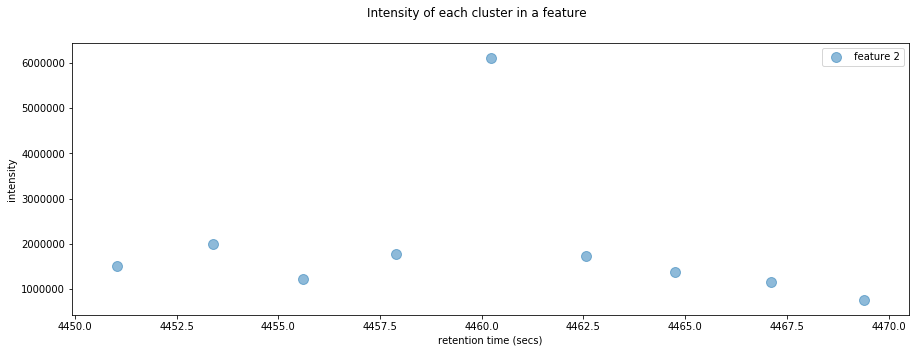

In [46]:
fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(15)
for idx,feature_id in enumerate(feature_ids):
    clusters_df = c_df[idx]
    ax.plot(clusters_df.retention_time_secs, clusters_df.intensity_sum, marker='o', alpha=0.5, color=tableau20[idx], linestyle='', ms=10, label="feature {}".format(feature_id))
plt.legend(loc='best')
plt.xlabel('retention time (secs)')
plt.ylabel('intensity')
plt.suptitle('Intensity of each cluster in a feature')
plt.margins(0.06)
plt.show()

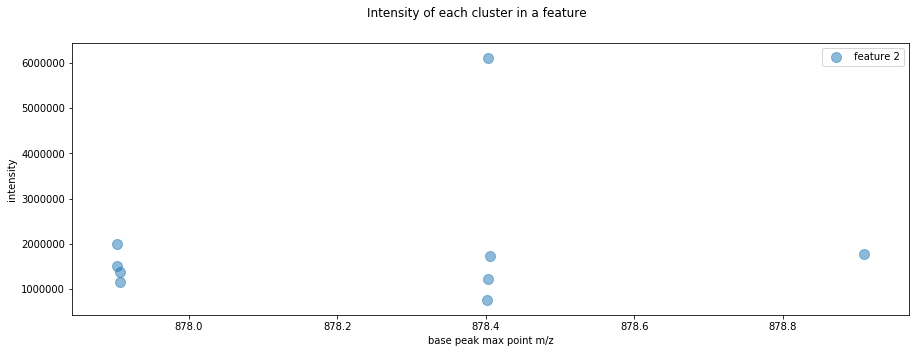

In [47]:
fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(15)
for idx,feature_id in enumerate(feature_ids):
    clusters_df = c_df[idx]
    ax.plot(clusters_df.base_peak_max_point_mz, clusters_df.intensity_sum, marker='o', alpha=0.5, color=tableau20[idx], linestyle='', ms=10, label="feature {}".format(feature_id))
plt.legend(loc='best')
plt.xlabel('base peak max point m/z')
plt.ylabel('intensity')
plt.suptitle('Intensity of each cluster in a feature')
plt.margins(0.06)
plt.show()